In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Metrail+dataset.csv", header=1)
df.columns = ['Month', 'Travellers']
df.head()

,Month,Travellers
0,Feb-91,1638.0
1,Mar-91,1987.0
2,Apr-91,1825.0
3,May-91,NaN
4,Jun-91,1879.0


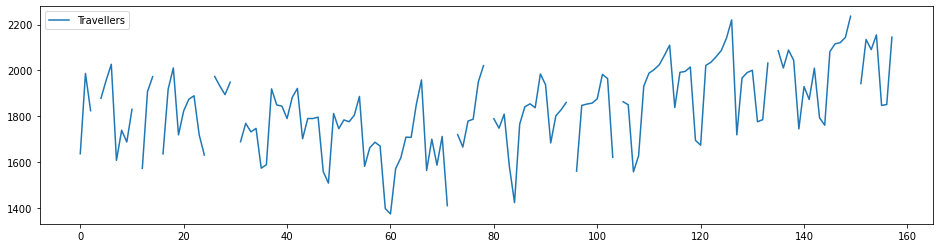

In [3]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

In [4]:
df['Month'] =  pd.to_datetime(df['Month'], format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       158 non-null    datetime64[ns]
 1   Travellers  147 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [5]:
# Missig value Treatment (Linear Imputaiton)
df = df.assign(T_linear_imputation=df.Travellers.interpolate(method='linear')) 
df['Travellers'] = df['T_linear_imputation']
df = df.drop('T_linear_imputation', axis=1)
df.head()

,Month,Travellers
0,1991-02-01,1638.0
1,1991-03-01,1987.0
2,1991-04-01,1825.0
3,1991-05-01,1852.0
4,1991-06-01,1879.0


In [6]:
df = df.set_index('Month')

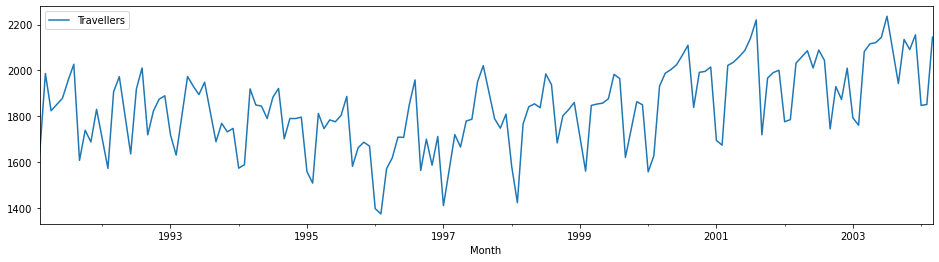

In [7]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

In [8]:
# Understanding quantile range
Q1 = df['Travellers'].quantile(0.25)
Q3 = df['Travellers'].quantile(0.75)
IQR = Q3 - Q1

print("quantile(0.25)", Q1)
print("quantile(0.75)", Q3)
print("IQR", IQR)

quantile(0.25) 1714.75
quantile(0.75) 1973.75
IQR 259.0


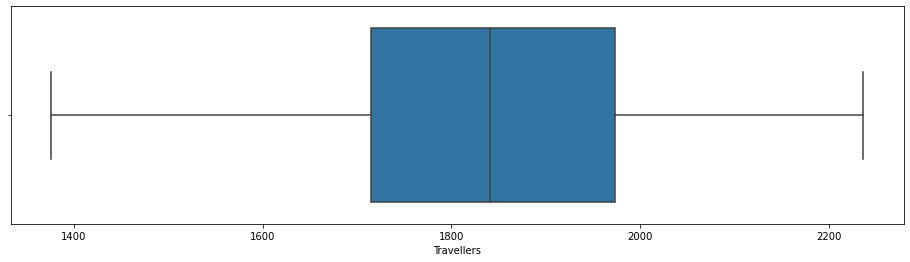

In [9]:
fig = plt.subplots(figsize=(16,4))
ax = sns.boxplot(x = df['Travellers'], whis=1.4)

- when ehis=1 there are some outliers but seems like they are part of trend not going outseide the pattern when look at the trend chart

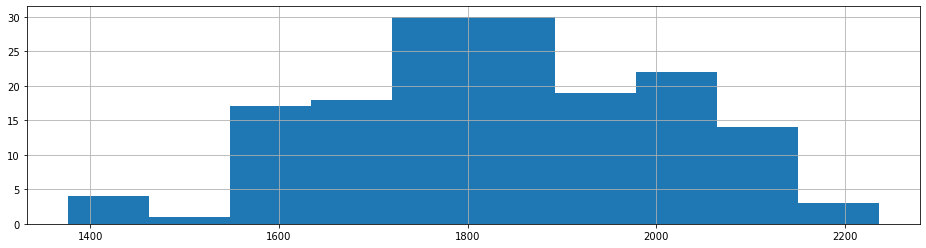

In [10]:
fig = df.Travellers.hist(figsize=(16,4))

- No discontineous extream values

In [12]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 12,8

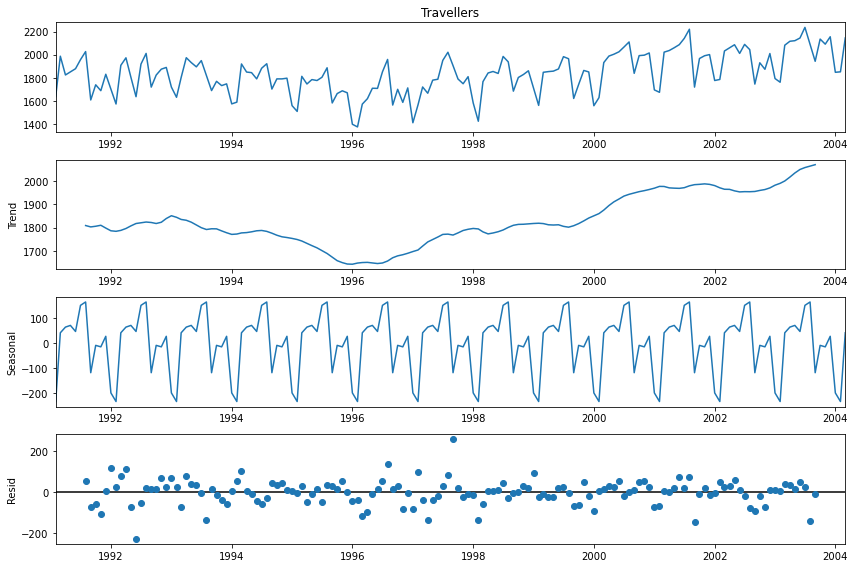

In [13]:
## Additive seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df.Travellers, model='additive')
fig = decomposition.plot()

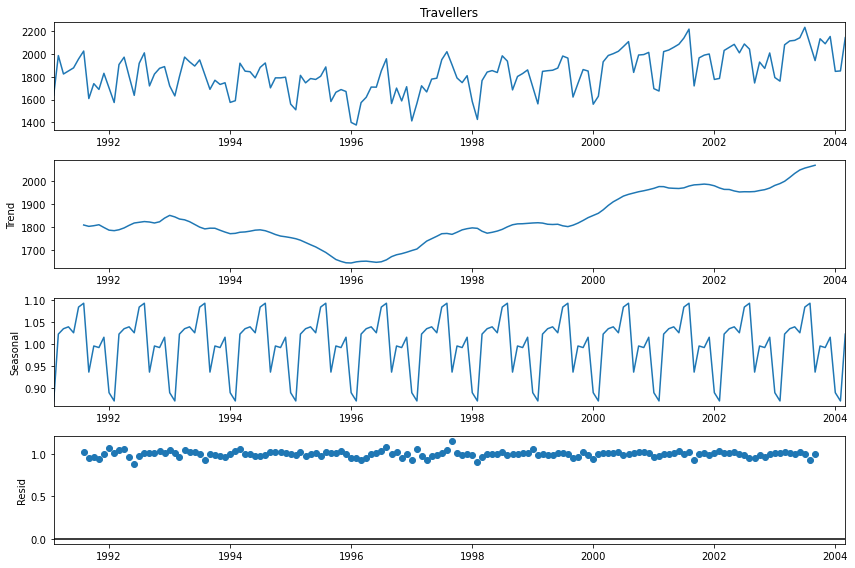

In [14]:
## Multiplicative seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(df.Travellers, model='multiplicative')
fig = decomposition.plot()